In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = 10, 8

In [3]:
df_hits = pd.read_csv ("../Data/top_100_Billboard_2000_2020.csv")

In [4]:
df_hits.head()

,artist,title,id,year_chart,date_chart,release_date,collaboration,rank,weeks,isNew,peakPos,lastPos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity_artist,popularity_song,genres,album,label,song_lyrics
0,Santana,Smooth (feat. Rob Thomas),0n2SEXB2qoRQg171q7XqeW,2000,2000-01-01,1999-06-15,True,1,23,False,1,1,0.609,0.923,9,-3.908,1,0.0338,0.1600,0.000005,0.2950,0.9610,115.996,4,294986,74,70,"['blues rock', 'classic rock', 'mexican classi...",Supernatural (Remastered),Columbia/Legacy,"Man, it's a hot one\nLike seven inches from th..."
1,Brian McKnight,Back At One,6mwA6YiKDjAUG8kWvRRUPh,2000,2000-01-01,1999-09-21,False,2,19,False,2,2,0.661,0.346,11,-9.115,1,0.0300,0.4520,0.000000,0.1310,0.2560,129.752,4,263666,65,70,"['dance pop', 'neo soul', 'new jack swing', 'q...",Back At One,Motown,It's undeniable\nThat we should be together\nI...
2,Jessica Simpson,I Wanna Love You Forever,5gZEhPrN1VLqTG1nIAXeNK,2000,2000-01-01,1999-11-16,False,3,12,False,3,3,0.590,0.666,4,-4.047,0,0.0244,0.1560,0.000000,0.1360,0.0743,104.042,4,263800,55,58,"['dance pop', 'post-teen pop', 'urban contempo...",Sweet Kisses,Columbia,You set my soul at ease\nChased darkness out o...
3,Whitney Houston,My Love Is Your Love,1ckU1EhAO0Nr73QYw24SWJ,2000,2000-01-01,1998-11-17,False,4,18,False,4,5,0.770,0.475,7,-9.512,1,0.1590,0.0557,0.000005,0.0607,0.4740,82.511,4,261573,81,68,"['dance pop', 'pop', 'urban contemporary']",My Love Is Your Love,Arista,"Clap your hands, y'all\nIt's alright (Turn me ..."
4,Savage Garden,I Knew I Loved You,6nozDLxeL0TE4MS9GqYU1v,2000,2000-01-01,1999-11-09,False,5,11,False,4,4,0.610,0.497,9,-9.880,1,0.0279,0.3200,0.000061,0.0884,0.7390,85.031,4,250360,68,69,"['boy band', 'dance pop', 'europop', 'pop rock']",Affirmation,Columbia,Maybe it's intuition\nBut some things you just...


in the last 20 years we calculate the total number of songs that have appeared on billboard's hot-100

In [5]:
df_hits["id"].nunique()

8216

## boxplot per year
    - we plot boxplot of each characteristic per year to see evolution over time

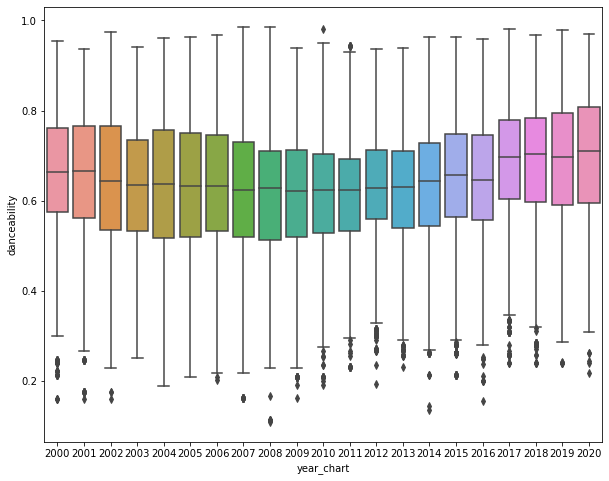

In [6]:
sns.boxplot(x="year_chart",y="danceability",data = df_hits);

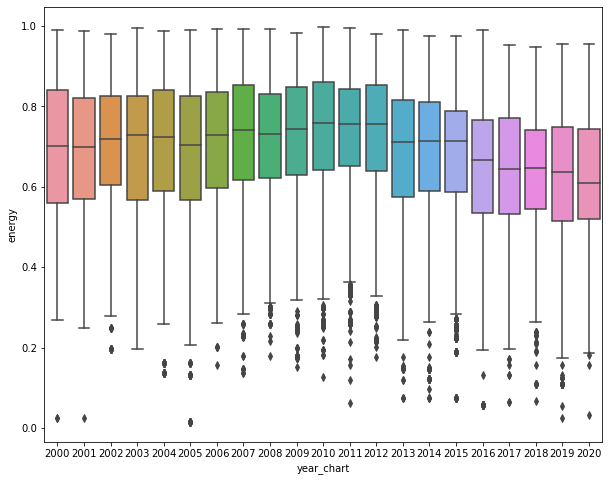

In [7]:
sns.boxplot(x="year_chart",y="energy",data = df_hits);

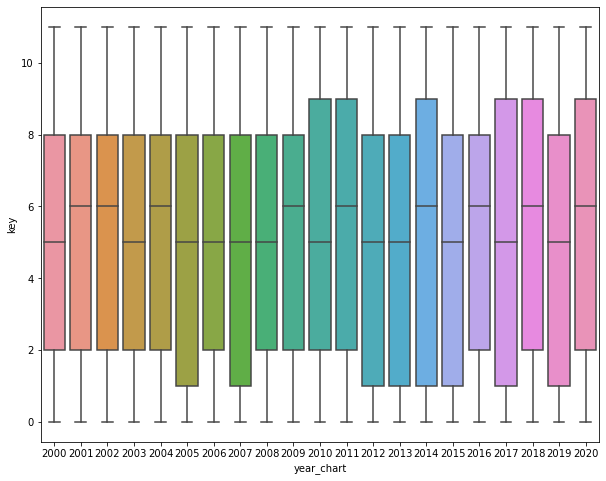

In [8]:
sns.boxplot(x="year_chart",y="key",data = df_hits);

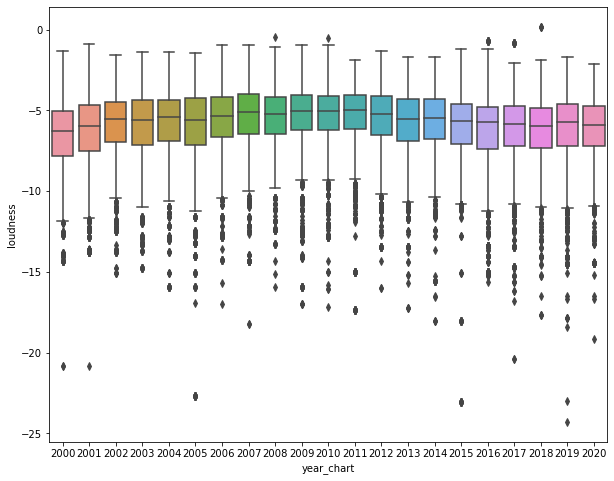

In [9]:
sns.boxplot(x="year_chart",y="loudness",data = df_hits);

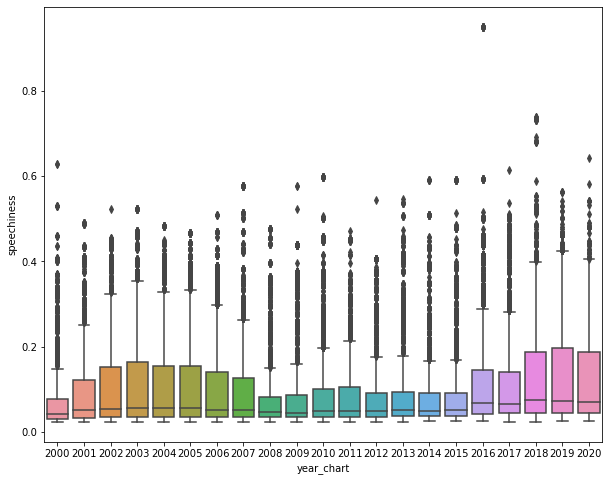

In [10]:
sns.boxplot(x="year_chart",y="speechiness",data = df_hits);

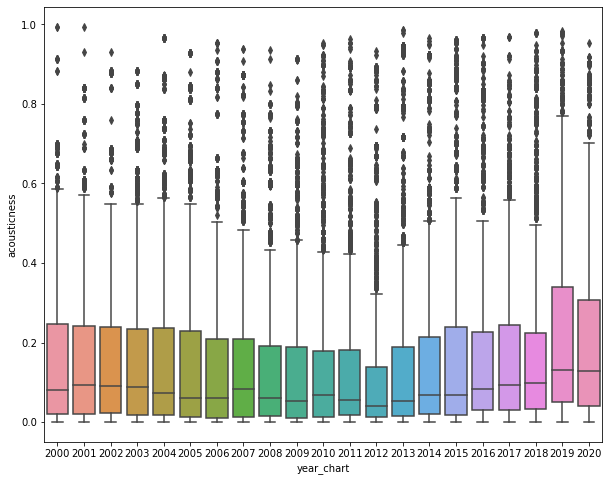

In [11]:
sns.boxplot(x="year_chart",y="acousticness",data = df_hits);

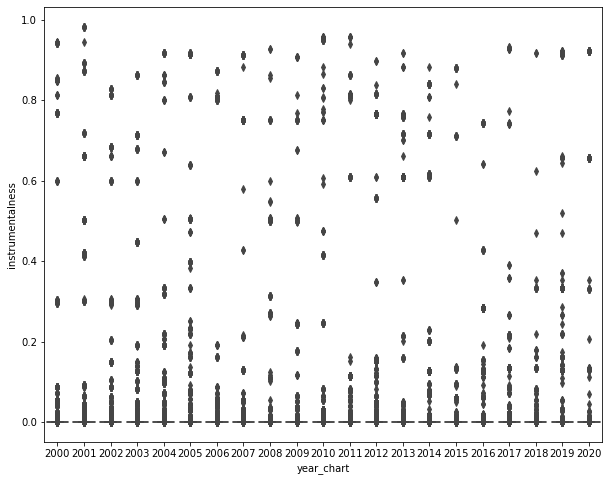

In [12]:
sns.boxplot(x="year_chart",y="instrumentalness",data = df_hits);

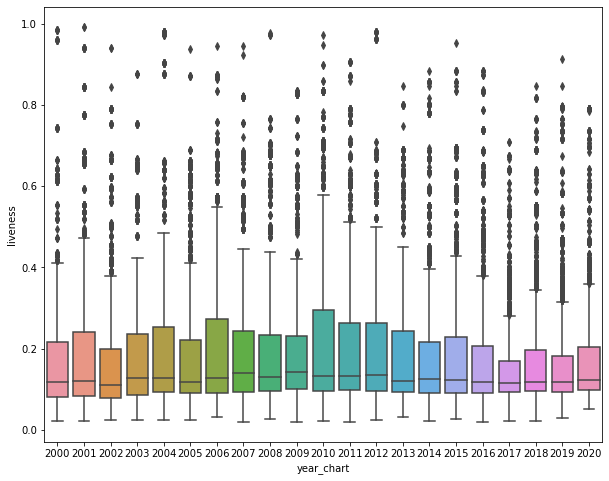

In [13]:
sns.boxplot(x="year_chart",y="liveness",data = df_hits);

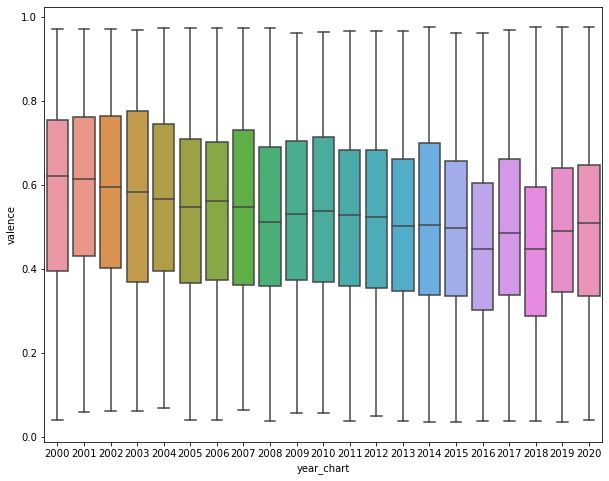

In [14]:
sns.boxplot(x="year_chart",y="valence",data = df_hits);

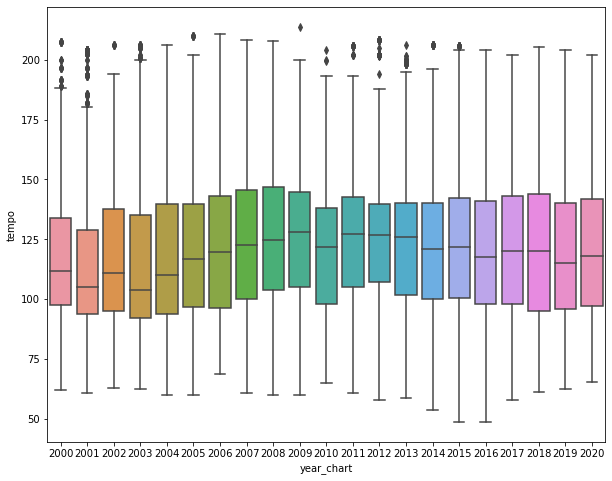

In [15]:
sns.boxplot(x="year_chart",y="tempo",data = df_hits);

## Correlation Matrix

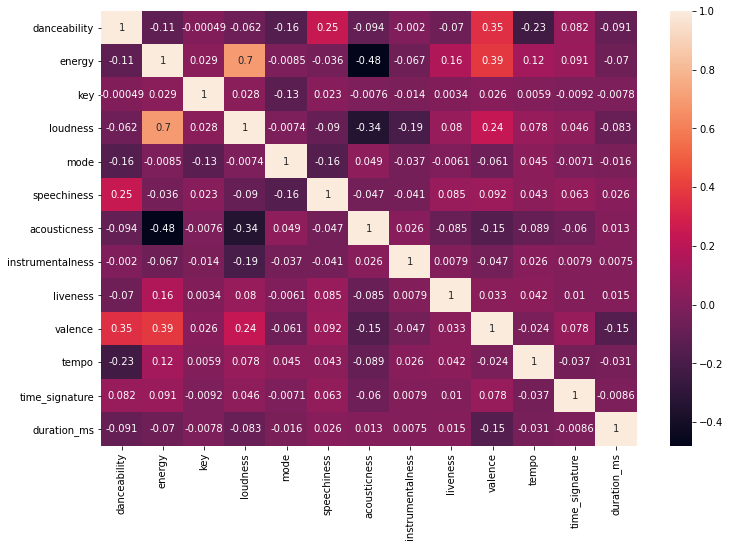

In [85]:
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
sns.heatmap(df_hits.loc[:,"danceability":"duration_ms"].corr(), annot = True);

## Top 10 artists with the most hits songs

In [16]:
df_hits_uniq = df_hits.sort_values("weeks", ascending=False).drop_duplicates(subset = ["id"])

In [17]:
print (df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"])

artist
Glee Cast        202
Drake            146
Taylor Swift      91
Eminem            70
Lil Wayne         67
Future            65
Justin Bieber     62
Kanye West        62
The Weeknd        53
Beyoncé           51
Name: title, dtype: int64


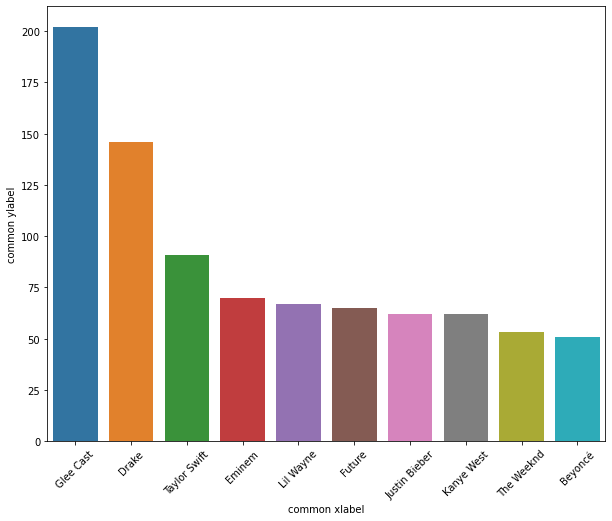

In [18]:
artists_bar_data = df_hits_uniq.groupby("artist").count().sort_values('title',ascending=False).iloc[:10]["title"]
chart = sns.barplot(artists_bar_data.index, artists_bar_data.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [21]:
df_top_artists = df_hits_uniq.groupby(["artist","year_chart"])\
.count().sort_values('title',ascending=False).iloc[:]["title"].reset_index()

In [25]:
df_artists_10 = df_top_artists [(df_top_artists["artist"] == artists_bar_data.index[0]) |
                            (df_top_artists["artist"] == artists_bar_data.index[1]) |
                            (df_top_artists["artist"] == artists_bar_data.index[2]) |
                            (df_top_artists["artist"] == artists_bar_data.index[3]) |
                            (df_top_artists["artist"] == artists_bar_data.index[4]) |
                            (df_top_artists["artist"] == artists_bar_data.index[5]) |
                            (df_top_artists["artist"] == artists_bar_data.index[6]) |
                            (df_top_artists["artist"] == artists_bar_data.index[7]) |
                            (df_top_artists["artist"] == artists_bar_data.index[8]) |
                            (df_top_artists["artist"] == artists_bar_data.index[9])]
df_artists_10 = df_artists_10.rename(columns={"title":"count"})
df_artists_10 = df_artists_10.astype({"count": float})

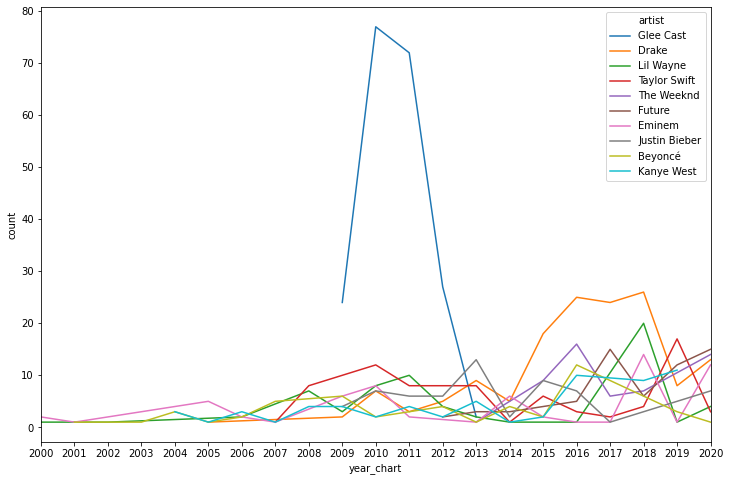

In [26]:
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
ax.set_xlim(2000,2020)
ax.set_xticks(range(2000,2021))
sns.lineplot(x="year_chart", y="count",hue="artist", data=df_artists_10);

## Songs more weeks on hit list

In [27]:
print (df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10][["artist","title","weeks","release_date"]])

                 artist                title  weeks release_date
74401   Imagine Dragons          Radioactive     87   2012-09-04
73704        AWOLNATION                 Sail     79         2011
50562        Jason Mraz            I'm Yours     76   2008-05-12
76686       OneRepublic       Counting Stars     68   2014-01-01
65035             LMFAO    Party Rock Anthem     68   2011-01-01
63636             Adele  Rolling in the Deep     65   2011-01-19
40974  Carrie Underwood     Before He Cheats     64   2005-11-14
32684         Lifehouse           You And Me     62   2005-03-22
70716     The Lumineers               Ho Hey     62   2012-04-03
75191   Imagine Dragons               Demons     61   2012-09-04


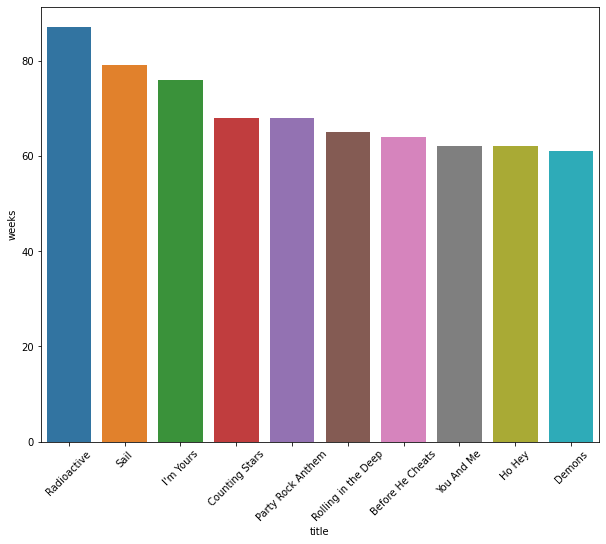

In [28]:
chart = sns.barplot(x="title",y="weeks",data = df_hits_uniq.sort_values('weeks',ascending=False).iloc[:10]);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Songs with the longest number 1

In [29]:
df_hits_1 = df_hits.drop(df_hits[df_hits["rank"]>1].index)

In [30]:
print (df_hits_1.groupby(["id","artist","title"]).count().sort_values("weeks",ascending = False).iloc[:15]["weeks"])

id                      artist            title                                           
2YpeDb67231RjR0MgVLzsG  Lil Nas X         Old Town Road - Remix                               19
6rPO02ozF3bM7NnOV4h6s2  Luis Fonsi        Despacito - Remix                                   16
32OlwWuMpZ6b0aN2RZOeMS  Mark Ronson       Uptown Funk (feat. Bruno Mars)                      14
5qsbHA7Z5a2vp5wtBIzioT  Black Eyed Peas   I Gotta Feeling - The Best Of The E.N.D. Version    14
3LmvfNUQtglbTrydsdIqFU  Mariah Carey      We Belong Together                                  14
2JzZzZUQj3Qff7wapcbKjc  Wiz Khalifa       See You Again (feat. Charlie Puth)                  12
5rb9QrpfcKFHM1EUbSIurX  Usher             Yeah! (feat. Lil Jon & Ludacris)                    12
5Z01UMMf7V1o0MzF86s6WJ  Eminem            Lose Yourself - From "8 Mile" Soundtrack            12
7BKLCZ1jbUBVqRi2FVlTVw  The Chainsmokers  Closer                                              12
7qiZfU4dY1lWllzX7mPBI3  Ed Sheeran  

## Record labels with the most hits

In [31]:
print (df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"])

label
Columbia              450
RCA Records Label     222
Atlantic Records      194
Warner Records        193
Jive                  158
Epic                  154
Def Jam Recordings    138
Interscope            121
Capitol Nashville     117
Republic Records      111
Name: id, dtype: int64


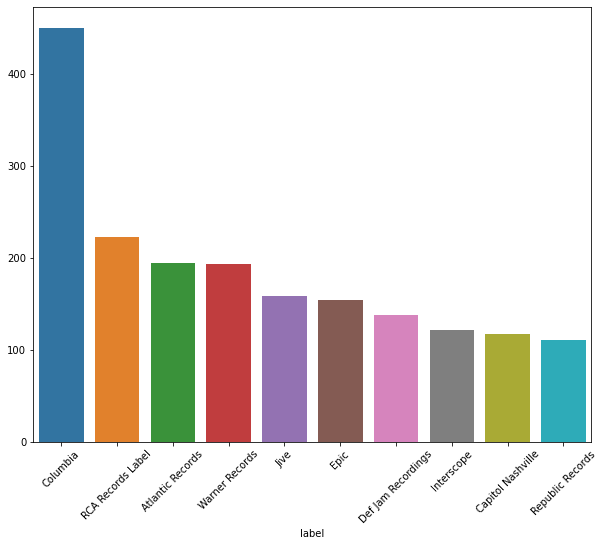

In [32]:
labels_bar_data = df_hits_uniq.groupby("label").count().sort_values('id',ascending=False).iloc[:10]["id"]
chart = sns.barplot(labels_bar_data.index, labels_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [33]:
df_label_years = df_hits_uniq.groupby(["label","year_chart"])\
.count().sort_values('id',ascending=False).iloc[:]["id"].reset_index()

In [34]:
df_label_10 = df_label_years [(df_label_years["label"] == labels_bar_data.index[0]) |
                                (df_label_years["label"] == labels_bar_data.index[1]) |
                                (df_label_years["label"] == labels_bar_data.index[2]) |
                                (df_label_years["label"] == labels_bar_data.index[3]) |
                                (df_label_years["label"] == labels_bar_data.index[4]) |
                                (df_label_years["label"] == labels_bar_data.index[5]) |
                                (df_label_years["label"] == labels_bar_data.index[6]) |
                                (df_label_years["label"] == labels_bar_data.index[7]) |
                                (df_label_years["label"] == labels_bar_data.index[8]) |
                                (df_label_years["label"] == labels_bar_data.index[9])]
df_label_10 = df_label_10.rename(columns={"id":"count"})
df_label_10 = df_label_10.astype({"count": float})

In [35]:
df_label_10[df_label_10["year_chart"]==2019]

,label,year_chart,count
2,Republic Records,2019,39.0
10,Columbia,2019,24.0
67,Warner Records,2019,13.0
74,Atlantic Records,2019,12.0
251,RCA Records Label,2019,7.0
353,Def Jam Recordings,2019,6.0
758,Epic,2019,3.0
1219,Capitol Nashville,2019,2.0


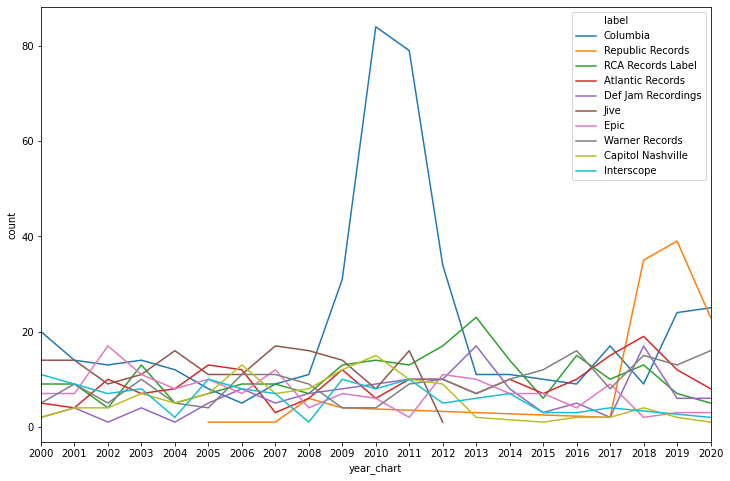

In [36]:
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
ax.set_xlim(2000,2020)
ax.set_xticks(range(2000,2021))
sns.lineplot(x="year_chart", y="count",hue="label", data=df_label_10);

In [37]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2009) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast            24
Mary Mary             1
The Ting Tings        1
Bow Wow               1
John Mayer            1
Maxwell               1
Bruce Springsteen     1
Boys Like Girls       1
Name: artist, dtype: int64

In [38]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2010) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast          77
John Mayer          2
Maxwell             2
Train               2
Boys Like Girls     1
Name: artist, dtype: int64

In [39]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2011) &
            (df_hits_uniq["label"]=="Columbia")]["artist"].value_counts()

Glee Cast           72
Train                3
Kreayshawn           1
Steven Tyler         1
Miranda Cosgrove     1
Mary Mary            1
Name: artist, dtype: int64

In [40]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2018) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Post Malone               17
Ariana Grande              8
Metro Boomin               6
NAV                        2
Ski Mask The Slump God     1
Drake                      1
Name: artist, dtype: int64

In [41]:
df_hits_uniq[(df_hits_uniq["year_chart"]==2019) &
                 (df_hits_uniq["label"]=="Republic Records")]["artist"].value_counts()

Ariana Grande             15
Post Malone               14
Lil Tecca                  4
Drake                      2
Ski Mask The Slump God     2
Metro Boomin               1
Jacquees                   1
Name: artist, dtype: int64

## Most common musical genres

In [42]:
all_genres = []
for genre in df_hits_uniq["genres"]:
    all_genres = all_genres + genre.strip('][').split(', ')
    
count_genres = Counter(all_genres)
count_genres_10 = count_genres.most_common()[:10]

In [54]:
df_count_genres_10 = pd.DataFrame(count_genres_10, columns =['genre', 'count'])
print (df_count_genres_10)

                    genre  count
0                   'pop'   2478
1             'dance pop'   2305
2               'pop rap'   2122
3                   'rap'   2081
4               'hip hop'   1516
5         'post-teen pop'   1354
6  'contemporary country'   1272
7               'country'   1209
8          'country road'   1183
9                  'trap'   1101


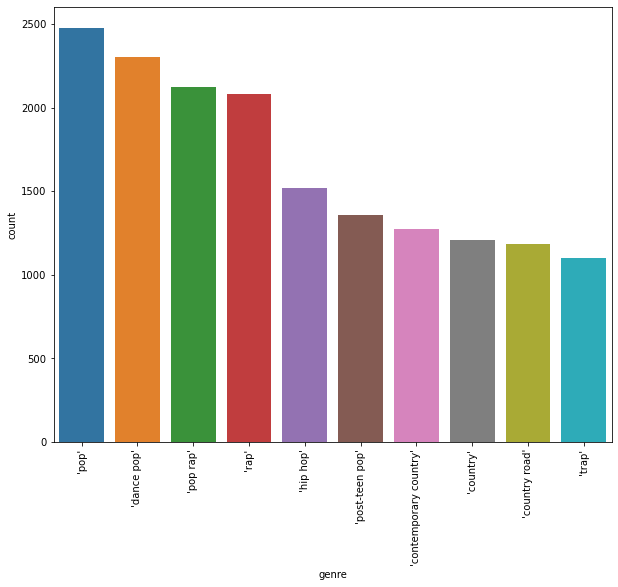

In [55]:
chart = sns.barplot (x="genre", y= "count",data= df_count_genres_10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

### Evolution of genres over the years

In [56]:
def genres_year (year):
    all_genres = []
    for genre in df_hits_uniq.loc[df_hits_uniq["year_chart"]==year]["genres"]:
        all_genres = all_genres + genre.strip('][').split(', ')

    count_genres_years = Counter(all_genres)
    count_genres_years = count_genres_years.most_common()
    df_count_genres_years = pd.DataFrame(count_genres_years, columns =['genre', 'count'])
    return df_count_genres_years

In [57]:
df_genres_years = pd.DataFrame(columns=("year","genre","count"))

for j in range  (0, 10):
    year  = 2000
    for i in range(0, 21): 
        df_genres_year = genres_year (year)
        df_genres_years.loc[len(df_genres_years)] = [year, df_count_genres_10.loc[j]["genre"],
                           int (df_genres_year[df_genres_year['genre'].str.contains(df_count_genres_10.loc[j]["genre"])]["count"])]
        year += 1
df_genres_years = df_genres_years.astype({"count": float})

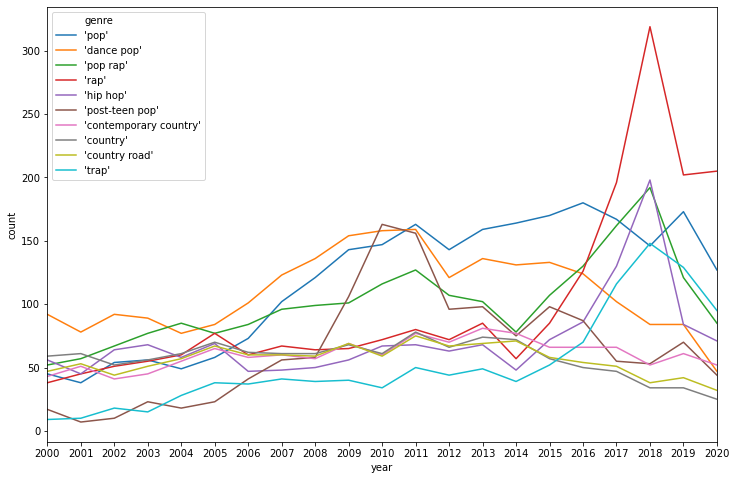

In [58]:
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
ax.set_xlim(2000,2020)
ax.set_xticks(range(2000,2021))
sns.lineplot(x="year", y="count",hue="genre", data=df_genres_years);

## Colaborations

In [59]:
print (df_hits_uniq["collaboration"].value_counts())

False    5915
True     2301
Name: collaboration, dtype: int64


In [60]:
print (df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"])

year_chart
2018    232.0
2019    189.0
2017    181.0
2020    179.0
2011    146.0
2015    136.0
2013    116.0
2010    113.0
2012    109.0
2016    108.0
2014    100.0
2008     96.0
2009     83.0
2006     74.0
2004     71.0
2007     69.0
2005     68.0
2003     67.0
2002     58.0
2000     58.0
2001     48.0
Name: collaboration, dtype: float64


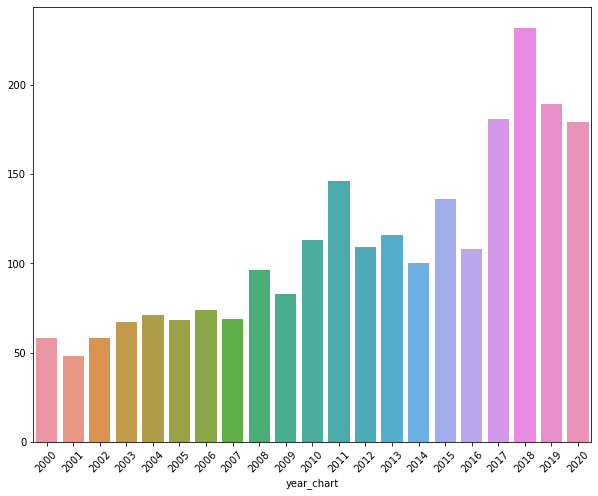

In [61]:
hits_bar_data = df_hits_uniq.groupby("year_chart").sum().sort_values('collaboration',ascending=False).iloc[:]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [62]:
print (df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"])

artist
Drake          51.0
Lil Wayne      38.0
Glee Cast      34.0
Eminem         29.0
Kanye West     28.0
Meek Mill      27.0
DJ Khaled      27.0
Future         24.0
JAY-Z          23.0
Chris Brown    22.0
Name: collaboration, dtype: float64


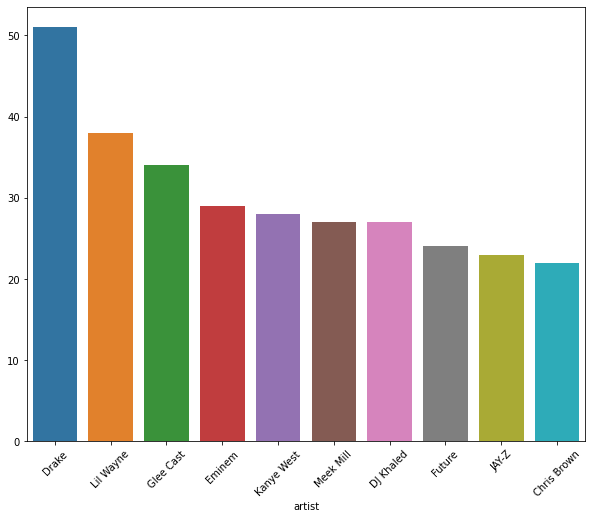

In [63]:
hits_bar_data = df_hits_uniq.groupby("artist").sum().sort_values('collaboration',ascending=False).iloc[:10]["collaboration"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [64]:
for index, value in hits_bar_data.iteritems():
    print ("Artist: ",index,"--> genres:" ,df_hits_uniq.loc[(df_hits_uniq["artist"]==index).idxmax(),"genres"])

Artist:  Drake --> genres: ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
Artist:  Lil Wayne --> genres: ['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
Artist:  Glee Cast --> genres: ['glee club', 'hollywood', 'post-teen pop', 'viral pop']
Artist:  Eminem --> genres: ['detroit hip hop', 'hip hop', 'rap']
Artist:  Kanye West --> genres: ['chicago rap', 'rap']
Artist:  Meek Mill --> genres: ['hip hop', 'philly rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  DJ Khaled --> genres: ['dance pop', 'dirty south rap', 'hip hop', 'miami hip hop', 'pop', 'pop rap', 'rap', 'southern hip hop', 'trap', 'urban contemporary']
Artist:  Future --> genres: ['atl hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
Artist:  JAY-Z --> genres: ['east coast hip hop', 'hip hop', 'pop rap', 'rap']
Artist:  Chris Brown --> genres: ['dance pop', 'pop', 'pop rap', 'r&b', 'rap']


## Albums with the most hits

In [65]:
print (df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:20]["title"])

album                                         artist       
Glee: The Music, The Complete Season Three    Glee Cast        32
Glee: The Music, The Complete Season Two      Glee Cast        30
Scorpion                                      Drake            25
More Life                                     Drake            22
Tha Carter V                                  Lil Wayne        21
Views                                         Drake            19
Starboy                                       The Weeknd       18
beerbongs & bentleys                          Post Malone      18
ASTROWORLD                                    Travis Scott     17
Glee: The Music, Volume 3 Showstoppers        Glee Cast        17
Lover                                         Taylor Swift     17
Hollywood's Bleeding                          Post Malone      16
Glee: The Music, Volume 4                     Glee Cast        16
Eternal Atake                                 Lil Uzi Vert     16
Championships   

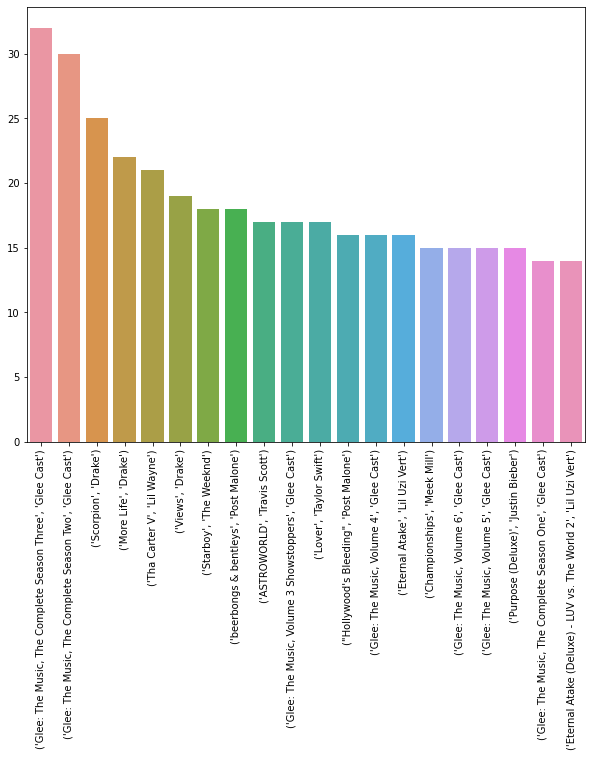

In [66]:
hits_bar_data = df_hits_uniq.groupby(["album","artist"]).count().sort_values('title',ascending=False).iloc[:20]["title"]
chart = sns.barplot(hits_bar_data.index, hits_bar_data.values);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);